In [1]:
import numpy as np

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

In [6]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 検証する最適化手法
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 訓練する
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    # 損失関数の値を出力
    if i % 500 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
Adam:2.1827561387959196
AdaGrad:2.2171750433525075
Momentum:2.4122710022111544
SGD:2.4042658879862593
===========iteration:500===========
Adam:0.07715808561338756
AdaGrad:0.037686644256801106
Momentum:0.1060435047134101
SGD:0.34440074051746056
===========iteration:1000===========
Adam:0.06235224511498764
AdaGrad:0.03565865756466449
Momentum:0.04943217994902571
SGD:0.23586483870560765
===========iteration:1500===========
Adam:0.0549708937527332
AdaGrad:0.06940825530311753
Momentum:0.1544448219389851
SGD:0.3405133580105574


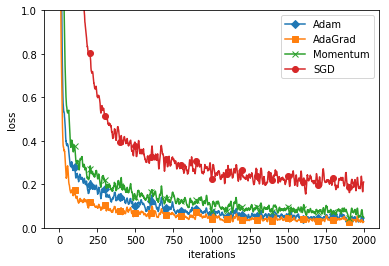

In [7]:
% matplotlib inline
import matplotlib.pyplot as plt

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

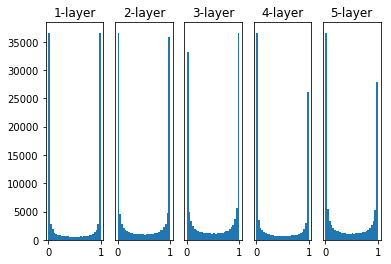

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    # y軸の目盛りを消す
    if i != 0:
        plt.yticks([], [])
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

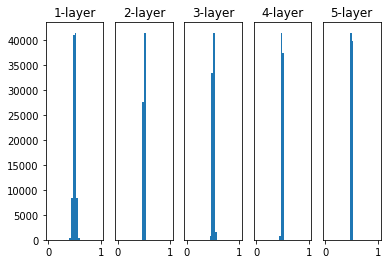

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 0.01
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    if i != 0:
        plt.yticks([], [])
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

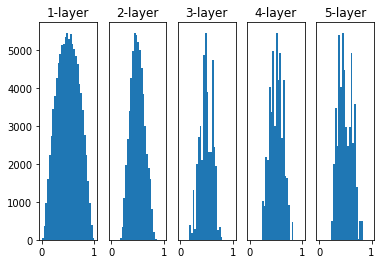

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    if i != 0:
        plt.yticks([], [])
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

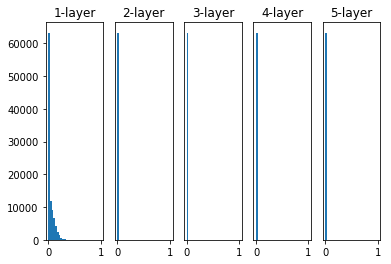

In [11]:
def relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 0.01
    z = np.dot(x, w)
    a = relu(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    if i != 0:
        plt.yticks([], [])
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

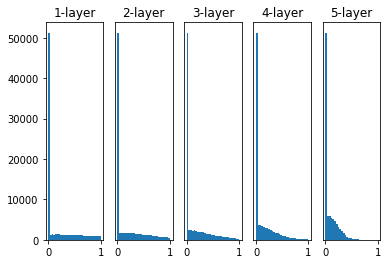

In [12]:
def relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = relu(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    if i != 0:
        plt.yticks([], [])
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

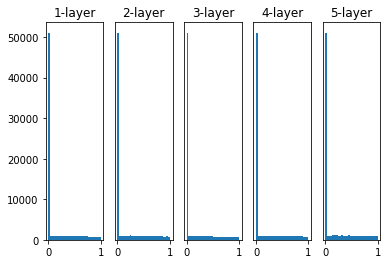

In [13]:
def relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num/2)
    z = np.dot(x, w)
    a = relu(z)
    activations[i] = a
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    if i != 0:
        plt.yticks([], [])
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

In [14]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 検証する最適化手法
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)


networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100],
        output_size=10,
        weight_init_std=weight_type
    )
    train_loss[key] = []

# 訓練する
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    # 損失関数の値を出力
    if i % 500 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
He:2.3692517209441917
Xavier:2.2932117497239295
std=0.01:2.302526668888066
===========iteration:500===========
He:0.4185020551566273
Xavier:1.0258764365104331
std=0.01:2.3039197161424685
===========iteration:1000===========
He:0.1997358975279218
Xavier:0.3518224913868673
std=0.01:2.304666970242248
===========iteration:1500===========
He:0.26217173908061997
Xavier:0.4232869722832372
std=0.01:2.3029795538144993


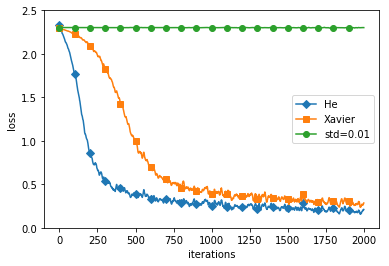

In [15]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()